<a href="https://colab.research.google.com/github/amrrahman1/Sales-Prediction/blob/main/Sales_Pred_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [380]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading and Exploring data.

In [381]:
# imports :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [382]:
# uploading the work sheet
filename = '/content/drive/MyDrive/Coding Dojo/sales_predictions.csv'

sales_predictions = pd.read_csv(filename)

In [383]:
# verifying data
sales_predictions.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [384]:
#1) How many rows and columns?
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [385]:
# 2) What are the datatypes of each variable?
sales_predictions.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Data Cleaning 

In [386]:
## 3) Are there duplicates? If so, drop any duplicates.
# check for Duplicates :
sales_predictions.duplicated().any()

False

In [387]:
#4) Identify missing values.
sales_predictions.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [388]:
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [389]:
# dropped the Item weight Column as its irrelevant to the project target of predicting sales.
sales_predictions = sales_predictions.drop(columns= 'Item_Weight')

# replaced the null value to in column Outlet_Size to the most common.
sales_predictions['Outlet_Size'].fillna(method='ffill', inplace=True)

In [390]:
sales_predictions.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [391]:
sales_predictions[	"Outlet_Size"	].value_counts()

Medium    3912
Small     3321
High      1290
Name: Outlet_Size, dtype: int64

In [392]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
sales_predictions[	"Item_Fat_Content"	].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [393]:
# fixing LF, low fat and reg
sales_predictions["Item_Fat_Content"]= sales_predictions["Item_Fat_Content"].replace('reg', "Regular")
sales_predictions["Item_Fat_Content"]= sales_predictions["Item_Fat_Content"].replace('LF', "Low Fat")
sales_predictions["Item_Fat_Content"]= sales_predictions["Item_Fat_Content"].replace('low fat',"Low Fat")


In [394]:
sales_predictions[	"Item_Fat_Content"	].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [395]:
# Getting the statistical values for the data set
sales_predictions.describe().round()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.0,8523.0,8523.0,8523.0
mean,0.0,141.0,1998.0,2181.0
std,0.0,62.0,8.0,1706.0
min,0.0,31.0,1985.0,33.0
25%,0.0,94.0,1987.0,834.0
50%,0.0,143.0,1999.0,1794.0
75%,0.0,186.0,2004.0,3101.0
max,0.0,267.0,2009.0,13087.0


# Data Visualization

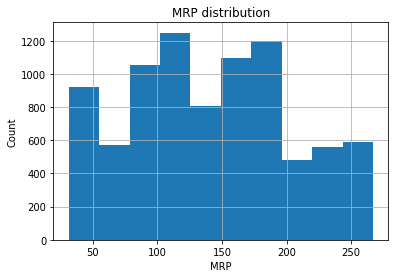

MRP per item tends to fall arount 150


In [396]:
sales_predictions['Item_MRP'].hist(bins=10);
plt.xlabel('MRP')
plt.ylabel('Count')
plt.title('MRP distribution')
plt.show();
print ('MRP per item tends to fall arount 150')

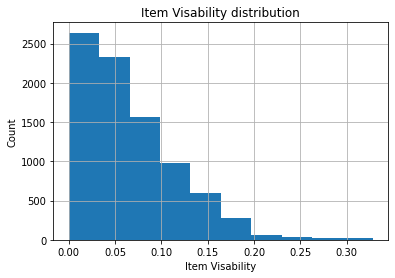

In [397]:
sales_predictions['Item_Visibility'].hist();
plt.xlabel('Item Visability')
plt.ylabel('Count')
plt.title('Item Visability distribution')
plt.show();


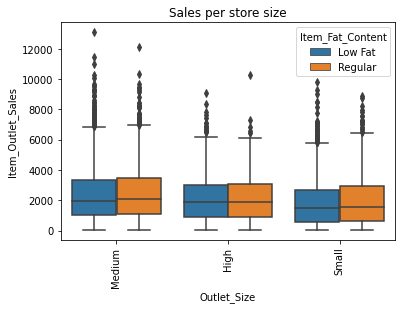

In [398]:
## Boxplot to view statistical summaries of various features in your dataset.
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', hue= 'Item_Fat_Content', data=sales_predictions);
plt.title(label="Sales per store size");
plt.xticks(rotation= 90);

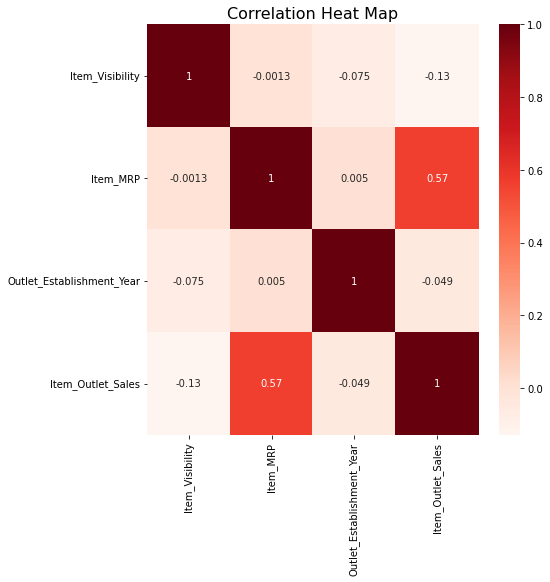

In [399]:
# Heatmap of the correlation between features.
plt.figure(figsize=(8,8))
sns.heatmap(sales_predictions.corr(), cmap='Reds', annot=True);
plt.tight_layout()
plt.title('Correlation Heat Map', fontsize= 16 );


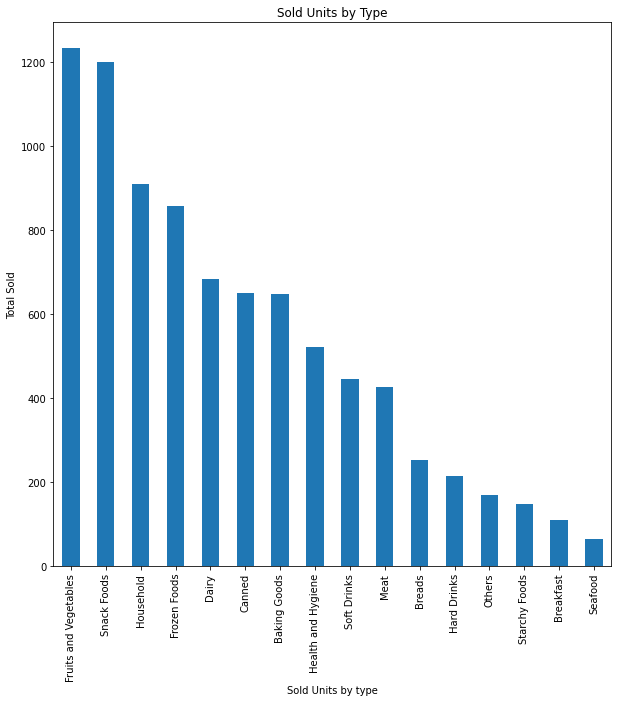

Top sold items are Fruits and vegetables


In [400]:
## This Bar shows the Sold units by Type, this can trigger a management decision to increase the volume of some itesm or remove some itesm froim the shelf.
sold_catgeories = sales_predictions['Item_Type'].value_counts()

sold_catgeories.plot(kind = 'bar', figsize = (10,10))
                 
plt.xlabel('Sold Units by type')
plt.ylabel('Total Sold')
plt.title('Sold Units by Type')

plt.show()

print('Top sold items are Fruits and vegetables')

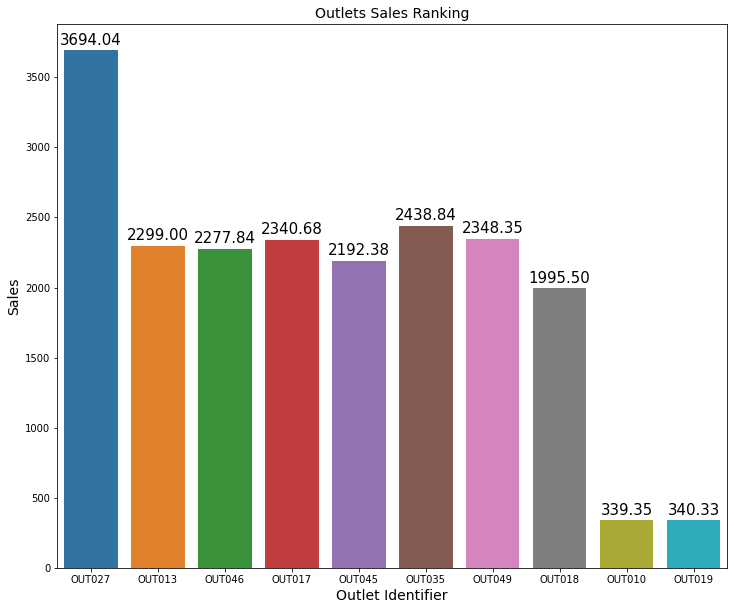

In [401]:
# Bar Chart to show the Highest performing Outlets in Sales.
df_sorted= sales_predictions.sort_values('Item_Outlet_Sales',ascending=False)
plt.figure(figsize=(12,10))
plots = sns.barplot(x="Outlet_Identifier", y="Item_Outlet_Sales",ci = None, data=df_sorted,)
for bar in plots.patches:
 plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0,10),
                   textcoords='offset points')
plt.xlabel("Outlet Identifier", size=14)
plt.ylabel("Sales", size=14)
plt.title("Outlets Sales Ranking", size=14);
plt.show()


# Pre-Processing Data

In [402]:
# Dropped Item_Identfier per Josh's suggestion.
sales_predictions = sales_predictions.drop(columns = 'Item_Identifier')

In [403]:
# Identify the target (X) and features (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  
X = sales_predictions.drop(columns = 'Item_Outlet_Sales')
y = sales_predictions['Item_Outlet_Sales']

#Perform a train test split 
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state =42)

In [404]:
# Selecting cat and num columns
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [405]:
sales_predictions_num = sales_predictions[num_selector]
sales_predictions_num.loc[:, sales_predictions_num.isna().any()]

""
0
1
2
3
4
...
8518
8519
8520
8521


In [406]:
# Choosing median to fill in the missing data for the Item_weight column
median_imputer = SimpleImputer(strategy='median')

# Fitting the mean imputer on the X train
median_imputer.fit(X_train[num_selector])

SimpleImputer(strategy='median')

In [407]:
#transforming the numeric columns of both the training and testing sets.
X_train.loc[:, num_selector] = median_imputer.transform(X_train[num_selector])
X_test.loc[:, num_selector] = median_imputer.transform(X_test[num_selector])

In [408]:
# using the Frequant imputer on the catagory data to fill missing value.
freq_imputer = SimpleImputer(strategy='most_frequent')

# Fitting on X train.
freq_imputer.fit(X_train[cat_selector])

SimpleImputer(strategy='most_frequent')

In [409]:
# Transforming both the Xtrain and X test sets.
X_train.loc[:, cat_selector] = freq_imputer.transform(X_train[cat_selector])
X_test.loc[:, cat_selector] = freq_imputer.transform(X_test[cat_selector])

In [410]:
# Making sure there is no missing values
print(X_train.isna().sum().sum(), 'missing values')
X_train.info()

0 missing values
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           6392 non-null   object 
 1   Item_Visibility            6392 non-null   float64
 2   Item_Type                  6392 non-null   object 
 3   Item_MRP                   6392 non-null   float64
 4   Outlet_Identifier          6392 non-null   object 
 5   Outlet_Establishment_Year  6392 non-null   float64
 6   Outlet_Size                6392 non-null   object 
 7   Outlet_Location_Type       6392 non-null   object 
 8   Outlet_Type                6392 non-null   object 
dtypes: float64(3), object(6)
memory usage: 499.4+ KB


In [411]:
# Instintiate the OHE
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()

In [412]:
#Transforming data columns to numeric
ohe_tuple = (encoder, cat_selector)
num_tuple = (scaler, num_selector)
column_trans = make_column_transformer(num_tuple,ohe_tuple,remainder='passthrough')

#Modeling and Evaluation

### Linear Regression Model

In [413]:
# Fitting the model on the training set.
lin_reg = LinearRegression()
pipe = make_pipeline(column_trans,lin_reg)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff268d058d0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff268d05810>)])),
                ('linearregression', LinearRegression())])

In [414]:
def evaluate_model(y_true, y_pred):
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  r2 = r2_score(y_true, y_pred)

  print(f'scores: MAE: {mae}, \nMSE: {mse}, \nRMSE: {rmse}, \
  \nR2: {r2}')

In [415]:
# Evaluating the training and testing data
print('Training Scores')
evaluate_model(y_train, pipe.predict(X_train))

print('\n')

print('Testing Scores')
evaluate_model(y_test, pipe.predict(X_test))

Training Scores
scores: MAE: 847.210251283266, 
MSE: 1297556.495957899, 
RMSE: 1139.1033736926156,   
R2: 0.561555696213579


Testing Scores
scores: MAE: 803.9419844517594, 
MSE: 1194212.4732896802, 
RMSE: 1092.8002897554888,   
R2: 0.5671539310716613


#### Linear Regression Model Evaluation :
#### r2 scores shows that the Linear regression model is a well fitted model with low score.
#### The RMSE scores are high and very similar which shows a higher tendency for errors.





### Decision Tree Regressor Model

In [416]:
# Intiating the deceision tree regressor.
dec_tree = DecisionTreeRegressor(random_state = 42)

In [417]:
# Fitting the model on the training data
pipe_tree = make_pipeline(column_trans, dec_tree)
pipe_tree.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff268d058d0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff268d05810>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [418]:
# Evaluating the Model.
# Evaluating the training and testing data
print('Training Scores')
evaluate_model(y_train, pipe_tree.predict(X_train))

print('\n')

print('Testing Scores')
evaluate_model(y_test, pipe_tree.predict(X_test))

Training Scores
scores: MAE: 0.0, 
MSE: 0.0, 
RMSE: 0.0,   
R2: 1.0


Testing Scores
scores: MAE: 1031.8612765837636, 
MSE: 2207856.9414041154, 
RMSE: 1485.8859113014416,   
R2: 0.19975530383603546


####R2 was high on the training set and low on the test set which means that this model has a high variance meaning that the model is over fitted.

#### RMSE was zero on the training set and much higher on the testing set 